# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yoel Heardly Sirait
- **Email:** yoelsirait05@gmail.com
- **ID Dicoding:** mc306d5y0653

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda harian di tahun 2011 dan 2012?
2. Pada jam berapa (hr) dan bulan apa (mnth) yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?
3. Bagaimana perbandingan jumlah pengguna kasual dan terdaftar pada hari Sabtu di musim Fall tahun 2011 dan 2012?
4. Bagaimana kategori temperatur (Low, Medium, High) mempengaruhi jumlah penyewaan sepeda di tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [5]:

hour_df = pd.read_csv('data/hour.csv')

In [6]:
print("\nHour Data:")
hour_df.head()


Hour Data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Dataset hour.csv memberikan gambaran penyewaan sepeda per jam selama 2011-2012, dengan rata-rata 189 sepeda per jam dan maksimum 977 sepeda, menunjukkan variasi penggunaan signifikan sepanjang hari serta dominasi pengguna terdaftar (rata-rata 153) atas pengguna kasual (rata-rata 35).
- Data siap untuk dianalisis lebih lanjut.

### Assessing Data

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.duplicated().sum()

0

**Insight:**
 hour_df (hour.csv)
   - Jumlah Baris dan Kolom: 17372 baris, 17 kolom.
   - Tipe data disini terutama pada object: dteday (harus diubah ke datetime).
   - Missing Value Aman (tidak ada yang missing value).
   - Tidak ada data duplikat.
   - Deskripsi Data tidak ada yang aneh

Kesimpulan serta saran untuk di cleaning
   - Kedua dataset bersih (tanpa missing values atau duplikat).
   - dteday perlu diubah ke tipe datetime.
   - Mengonversi kolom kategorikal (season, weathersit, yr, weekday) menjadi label yang lebih mudah dibaca juga pada temp kita kategorikan menjadi (Low, Medium, High) Low: -8°C to 8°C, Medium: 8°C to 24°C, High: 24°C to 39°C.
   - Menghapus kolom instant karena hanya indeks.

### Cleaning Data

before we start to cleaning, kita harus perhatikan secara detail mengenai data information bisa kita lihat pada kaggle nya sendiri. Dimana sebelumnya kita memutuskan untuk mengubah kolom kategorikal yang berisi numerical menjadi label, namun kita tidak bolehg asal mengubah. setelah saya baca introduction about this data terdapat penjelasan setiap attribute yang ada didalam data.

Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
for further more information please go through the following link,


Berdasarkan Information diatas mari kita sesuikan untuk cleaningnya

In [11]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [12]:
hour_df['season'] = hour_df['season'].astype(int)
hour_df['yr'] = hour_df['yr'].astype(int)
hour_df['weekday'] = hour_df['weekday'].astype(int)
hour_df['weathersit'] = hour_df['weathersit'].astype(int)

hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})  # Label musim
hour_df['yr'] = hour_df['yr'].map({0: 2011, 1: 2012})  # Label tahun
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})  # Label hari
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Few Clouds', 
    2: 'Mist+Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow+Fog'
})  # Label cuaca

In [ ]:
bins = [0, 0.33, 0.66, 1]  # Low: -8°C to 8°C, Medium: 8°C to 24°C, High: 24°C to 39°C
labels = ['Low', 'Medium', 'High']
hour_df['temp_category'] = pd.cut(hour_df['temp'], bins=bins, labels=labels, include_lowest=True)

In [14]:
hour_df = hour_df.drop(columns=['instant']) #drop column the instant

**Insight:**
- Kolom 'dteday' berhasil diubah ke datetime, meningkatkan kemampuan analisis waktu.
- Kolom kategorikal kini lebih deskriptif dan mudah dibaca;
- kolom 'temp_category' ditambahkan untuk mendukung analisis pengaruh temperatur;
- kolom 'instant' dihapus karena hanya indeks.

## Exploratory Data Analysis (EDA)

### Explore Data


In [15]:
# Statistik deskriptif
display(hour_df.describe(include='all'))

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_category
count,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,NaN,NaN,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Fall,NaN,NaN,NaN,NaN,Sat,NaN,Clear/Few Clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,4496,NaN,NaN,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9530
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [16]:
# Eksplorasi pengaruh cuaca
weather_group = hour_df.groupby(['weathersit', 'yr'])['cnt'].agg(['mean', 'sum', 'count']).reset_index()
print("Pengaruh Cuaca:")
display(weather_group)

Pengaruh Cuaca:


,weathersit,yr,mean,sum,count
0,Clear/Few Clouds,2011,155.013818,875053,5645
1,Clear/Few Clouds,2012,253.661581,1463120,5768
2,Heavy Rain/Snow+Fog,2011,36.000000,36,1
3,Heavy Rain/Snow+Fog,2012,93.500000,187,2
4,Light Snow/Rain,2011,86.421255,67495,781
5,Light Snow/Rain,2012,142.376176,90836,638
6,Mist+Cloudy,2011,135.490983,300519,2218
7,Mist+Cloudy,2012,212.997850,495433,2326


In [17]:
# Eksplorasi penyewaan per jam dan bulan
pivot = hour_df.pivot_table(index='hr', columns='mnth', values='cnt', aggfunc='mean')
print("Penyewaan per Jam dan Bulan:")
display(pivot)

Penyewaan per Jam dan Bulan:


mnth,1,2,3,4,5,6,7,8,9,10,11,12
hr,,,,,,,,,,,,
0,24.366667,29.196429,34.838710,44.316667,66.677419,70.366667,83.500000,68.491803,71.916667,63.721311,47.183333,39.838710
1,17.150000,16.875000,24.596774,26.866667,40.806452,43.250000,48.338710,39.737705,44.237288,39.116667,31.116667,27.145161
2,13.155172,12.185185,15.017241,20.133333,26.983871,27.633333,34.354839,27.098361,32.745763,25.183333,18.779661,19.145161
3,8.148936,6.039216,8.116667,10.137931,13.016129,13.433333,16.806452,13.655738,18.084746,13.288136,9.172414,8.950000
4,3.000000,2.466667,4.145455,4.898305,6.838710,8.833333,8.064516,8.081967,8.133333,8.033333,6.683333,5.423729
5,10.333333,10.660377,14.066667,15.450000,20.016129,25.200000,25.677419,26.163934,27.283333,24.433333,20.900000,16.741935
6,36.406780,41.929825,55.790323,65.700000,83.774194,103.900000,98.564516,103.114754,99.133333,89.900000,74.516667,57.274194
7,96.800000,127.877193,159.451613,192.400000,230.000000,285.516667,263.951613,283.870968,273.150000,247.616667,215.750000,162.854839
8,207.366667,254.350877,313.903226,349.916667,390.112903,434.833333,409.161290,436.806452,413.666667,414.950000,369.833333,305.967742


In [18]:
# Eksplorasi pengguna kasual vs terdaftar di Sabtu musim Fall
fall_sat = hour_df[(hour_df['season'] == 'Fall') & (hour_df['weekday'] == 'Sat')]
casual_reg_group = fall_sat.groupby('yr')[['casual', 'registered']].mean().reset_index()
print("Pengguna Kasual vs Terdaftar di Sabtu Musim Fall:")
display(casual_reg_group)

Pengguna Kasual vs Terdaftar di Sabtu Musim Fall:


,yr,casual,registered
0,2011,69.352941,121.594771
1,2012,90.005952,184.886905


In [19]:
# Eksplorasi pengaruh kategori temperatur
temp_group = hour_df.groupby(['temp_category', 'yr'])['cnt'].agg(['mean', 'count']).reset_index()
print("Pengaruh Kategori Temperatur:")
display(temp_group)

Pengaruh Kategori Temperatur:


,temp_category,yr,mean,count
0,Low,2011,67.989101,2202
1,Low,2012,118.985439,1923
2,Medium,2011,141.700873,4580
3,Medium,2012,233.714747,4950
4,High,2011,238.540526,1863
5,High,2012,356.732402,1861


**Insight:**
- Cuaca 'Clear/Few Clouds' menunjukkan rata-rata penyewaan tertinggi (155.01 di 2011 dan 253.66 di 2012) dengan jumlah data terbanyak (5645 di 2011, 5768 di 2012) dibandingkan kondisi lain, serta terdapat peningkatan signifikan dari 2011 ke 2012 di semua kategori cuaca, dengan lonjakan terbesar pada 'Clear/Few Clouds'.
- Penyewaan sepeda bervariasi signifikan per jam dan bulan, dengan nilai tertinggi pada jam sore (terutama jam 17-18) di bulan musim panas dan gugur (Mei-Oktober), sementara penyewaan terendah terjadi pada jam dini hari (terutama jam 4) di bulan musim dingin (Januari-Februari).
- Pengguna terdaftar memiliki rata-rata penyewaan lebih tinggi dibandingkan pengguna kasual pada hari Sabtu di musim Fall (121.59 vs 69.35 di 2011; 184.89 vs 90.01 di 2012), dengan peningkatan yang signifikan dari 2011 ke 2012 pada kedua kategori, terutama pada pengguna terdaftar yang naik lebih dari 50%.
- Kategori temperatur 'High' menunjukkan rata-rata penyewaan tertinggi (238.54 di 2011, 356.73 di 2012), diikuti 'Medium' (141.70 di 2011, 233.71 di 2012) dan 'Low' (67.99 di 2011, 118.99 di 2012), dengan peningkatan signifikan di semua kategori dari 2011 ke 2012, terutama pada 'Low' yang naik sekitar 75%.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda harian di tahun 2011 dan 2012?

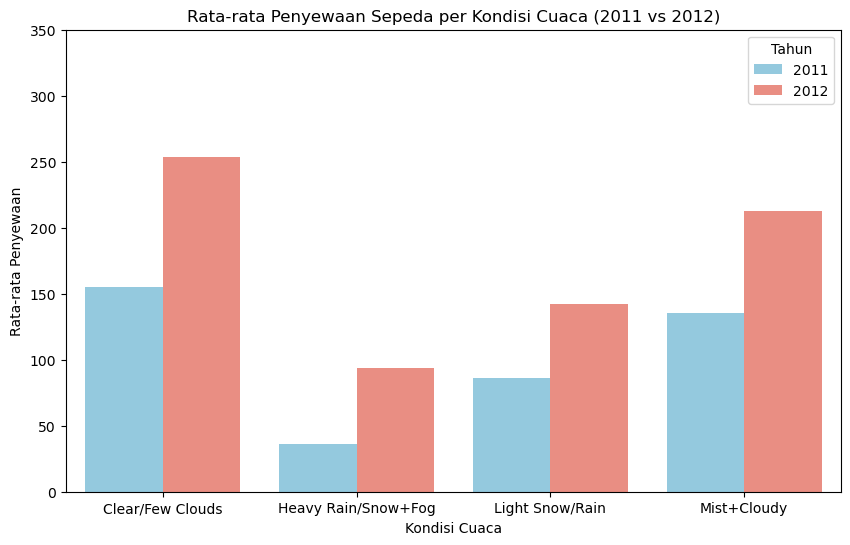

            weathersit    yr        mean
0     Clear/Few Clouds  2011  155.013818
1     Clear/Few Clouds  2012  253.661581
2  Heavy Rain/Snow+Fog  2011   36.000000
3  Heavy Rain/Snow+Fog  2012   93.500000
4      Light Snow/Rain  2011   86.421255
5      Light Snow/Rain  2012  142.376176
6          Mist+Cloudy  2011  135.490983
7          Mist+Cloudy  2012  212.997850


In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='mean', hue='yr', data=weather_group, palette=['skyblue', 'salmon'])
plt.title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca (2011 vs 2012)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.ylim(0, 350)
plt.legend(title='Tahun')
plt.show()
print(weather_group[['weathersit', 'yr', 'mean']])

### Pertanyaan 2: Pada jam berapa (hr) dan bulan apa (mnth) yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?

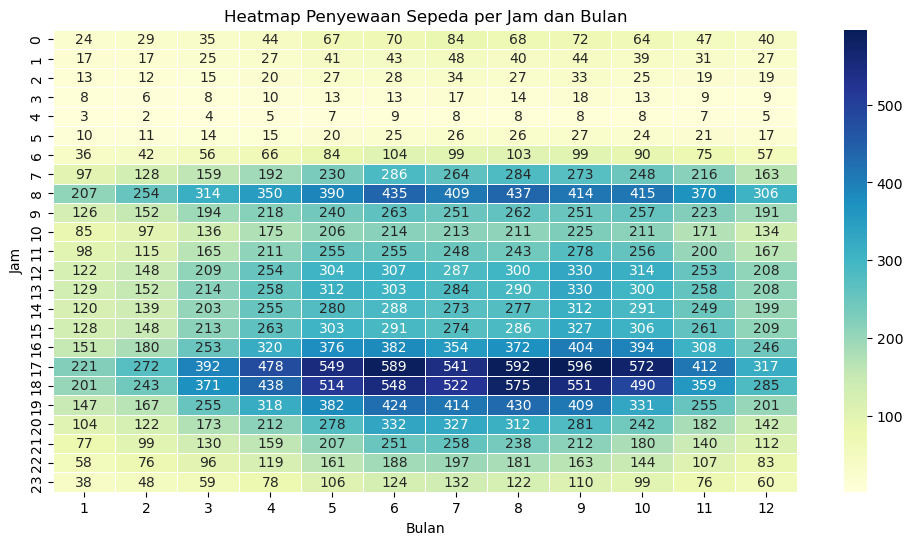

Penyewaan tertinggi: Jam 17 di bulan 9
Penyewaan terendah: Jam 4 di bulan 2


In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap Penyewaan Sepeda per Jam dan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jam')
plt.show()

max_hour_month = pivot.stack().idxmax()
min_hour_month = pivot.stack().idxmin()
print(f'Penyewaan tertinggi: Jam {max_hour_month[0]} di bulan {max_hour_month[1]}')
print(f'Penyewaan terendah: Jam {min_hour_month[0]} di bulan {min_hour_month[1]}')

### Pertanyaan 3: Bagaimana perbandingan jumlah pengguna kasual dan terdaftar pada hari Sabtu di musim Fall tahun 2011 dan 2012?

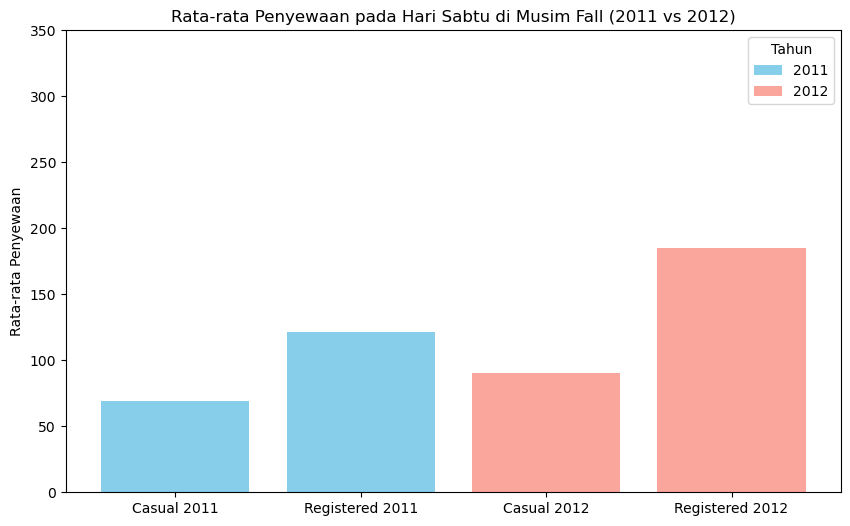

Rata-rata Penyewaan Casual 2011: 69.35
Rata-rata Penyewaan Registered 2011: 121.59
Rata-rata Penyewaan Casual 2012: 90.01
Rata-rata Penyewaan Registered 2012: 184.89


In [22]:

# Filter data untuk Sabtu di musim Fall
fall_sat_2011 = hour_df[(hour_df['season'] == 'Fall') & (hour_df['weekday'] == 'Sat') & (hour_df['yr'] == 2011)]
fall_sat_2012 = hour_df[(hour_df['season'] == 'Fall') & (hour_df['weekday'] == 'Sat') & (hour_df['yr'] == 2012)]

# Rata-rata pengguna
avg_2011 = [fall_sat_2011['casual'].mean(), fall_sat_2011['registered'].mean()]
avg_2012 = [fall_sat_2012['casual'].mean(), fall_sat_2012['registered'].mean()]

plt.figure(figsize=(10, 6))
plt.bar(['Casual 2011', 'Registered 2011'], [avg_2011[0], avg_2011[1]], label='2011', color='skyblue')
plt.bar(['Casual 2012', 'Registered 2012'], [avg_2012[0], avg_2012[1]], label='2012', color='salmon', alpha=0.7)
plt.title('Rata-rata Penyewaan pada Hari Sabtu di Musim Fall (2011 vs 2012)')
plt.ylabel('Rata-rata Penyewaan')
plt.ylim(0, 350)
plt.legend(title='Tahun')
plt.show()
print(f'Rata-rata Penyewaan Casual 2011: {avg_2011[0]:.2f}')
print(f'Rata-rata Penyewaan Registered 2011: {avg_2011[1]:.2f}')
print(f'Rata-rata Penyewaan Casual 2012: {avg_2012[0]:.2f}')
print(f'Rata-rata Penyewaan Registered 2012: {avg_2012[1]:.2f}')

### Pertanyaan 4: Bagaimana kategori temperatur (Low, Medium, High) mempengaruhi jumlah penyewaan sepeda di tahun 2011 dan 2012?

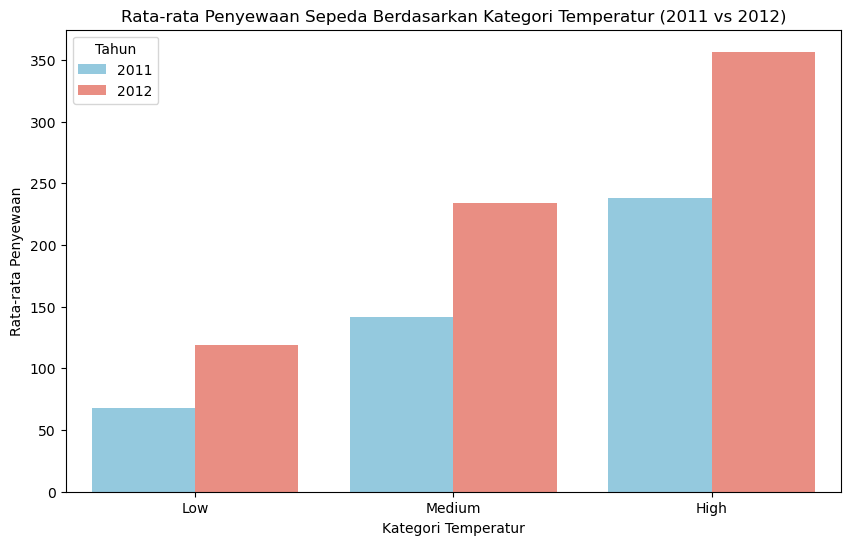

  temp_category    yr        mean  count
0           Low  2011   67.989101   2202
1           Low  2012  118.985439   1923
2        Medium  2011  141.700873   4580
3        Medium  2012  233.714747   4950
4          High  2011  238.540526   1863
5          High  2012  356.732402   1861


In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='temp_category', y='mean', hue='yr', data=temp_group, palette=['skyblue', 'salmon'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Temperatur (2011 vs 2012)')
plt.xlabel('Kategori Temperatur')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Tahun')
plt.show()
print(temp_group[['temp_category', 'yr', 'mean', 'count']])

**Insight:**
- Kondisi cuaca "Clear/Few Clouds" menghasilkan penyewaan tertinggi (155 di 2011, 253 di 2012), sedangkan "Heavy Rain/Snow+Fog" terendah (36 di 2011, 93 di 2012), dengan tren kenaikan di semua kondisi dari 2011 ke 2012.
- Penyewaan tertinggi terjadi pada jam 17 bulan September (sore hari di musim gugur), sedangkan terendah pada jam 4 bulan Februari (dini hari di musim dingin).
- Pengguna terdaftar mendominasi penyewaan di Sabtu musim Fall (121.59 vs 69.35 di 2011; 184.89 vs 90.01 di 2012), dengan peningkatan signifikan dari 2011 ke 2012.
- Temperatur "High" memiliki penyewaan tertinggi (238 di 2011, 356 di 2012), diikuti "Medium" dan "Low", dengan kenaikan di semua kategori dari 2011 ke 2012.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: Kondisi cuaca cerah meningkatkan penyewaan sepeda secara signifikan, dengan pertumbuhan dari 2011 ke 2012 di semua kondisi cuaca.
- Conclusion pertanyaan 2: Penyewaan sepeda paling tinggi pada jam 17 di bulan September dan paling rendah pada jam 4 di bulan Februari, mencerminkan pengaruh waktu dan musim.
- Conclusion pertanyaan 3: Pengguna terdaftar jauh lebih banyak menyewa sepeda dibandingkan pengguna kasual pada Sabtu di musim Fall, dengan lonjakan penggunaan dari 2011 ke 2012.
- Conclusion pertanyaan 4: Temperatur tinggi (24°C-39°C) mendorong penyewaan sepeda tertinggi, dengan tren positif dari 2011 ke 2012 di semua kategori temperatur.